In [155]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [156]:
df = pd.read_csv('C:\\Users\\italo\\Desktop\\SAÚDE E IA\\Database\\mtsamples.csv')
df

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
...,...,...,...,...,...,...
4994,4994,Patient having severe sinusitis about two to ...,Allergy / Immunology,Chronic Sinusitis,"HISTORY:, I had the pleasure of meeting and e...",NaN
4995,4995,This is a 14-month-old baby boy Caucasian who...,Allergy / Immunology,Kawasaki Disease - Discharge Summary,"ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...","allergy / immunology, mucous membranes, conjun..."
4996,4996,A female for a complete physical and follow u...,Allergy / Immunology,Followup on Asthma,"SUBJECTIVE: , This is a 42-year-old white fema...",NaN
4997,4997,Mother states he has been wheezing and coughing.,Allergy / Immunology,Asthma in a 5-year-old,"CHIEF COMPLAINT: , This 5-year-old male presen...",NaN


Etapa de pré-processamento 

In [157]:
df.columns

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='str')

In [158]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         4999 non-null   int64
 1   description        4999 non-null   str  
 2   medical_specialty  4999 non-null   str  
 3   sample_name        4999 non-null   str  
 4   transcription      4966 non-null   str  
 5   keywords           3931 non-null   str  
dtypes: int64(1), str(5)
memory usage: 234.5 KB


In [159]:
df.mean(numeric_only=True)

Unnamed: 0    2499.0
dtype: float64

In [160]:
df.isnull().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [161]:
df.describe()

,Unnamed: 0
count,4999.000000
mean,2499.000000
std,1443.231328
min,0.000000
25%,1249.500000
50%,2499.000000
75%,3748.500000
max,4998.000000


In [162]:
df.duplicated
df.duplicated().sum()

np.int64(0)

Pré-processamento 

Removendo valores faltantes.

In [163]:
df.dropna(inplace=True)

In [164]:
df.info()

<class 'pandas.DataFrame'>
Index: 3898 entries, 0 to 4995
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         3898 non-null   int64
 1   description        3898 non-null   str  
 2   medical_specialty  3898 non-null   str  
 3   sample_name        3898 non-null   str  
 4   transcription      3898 non-null   str  
 5   keywords           3898 non-null   str  
dtypes: int64(1), str(5)
memory usage: 213.2 KB


Selecionando as 10 especialidades mais recorrentes 

In [165]:
top_10 = df['medical_specialty'].value_counts().head(10)
top_10

medical_specialty
Surgery                          1021
Orthopedic                        303
Cardiovascular / Pulmonary        280
Radiology                         251
Consult - History and Phy.        234
Gastroenterology                  195
Neurology                         168
General Medicine                  146
SOAP / Chart / Progress Notes     142
Urology                           140
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 especialidades médicas')

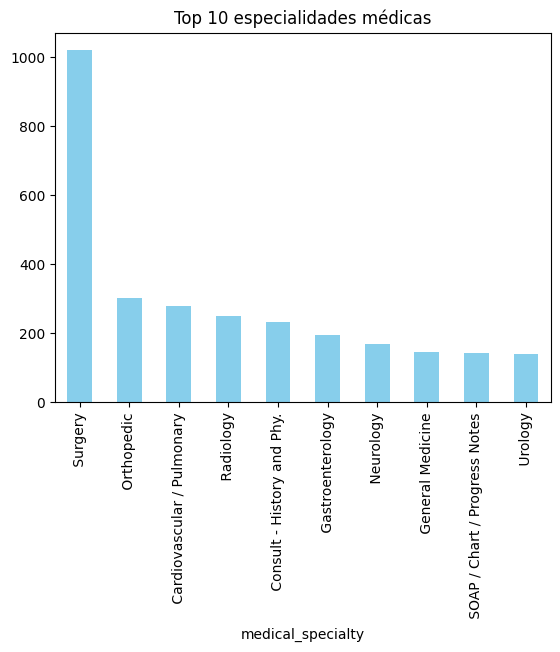

In [166]:
graph_top_10 = top_10.plot(kind='bar', color='skyblue')
graph_top_10.set_title('Top 10 especialidades médicas')

In [167]:
df_top_10 = df[df['medical_specialty'].isin(top_10.index)].copy()
df_top_10.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."
7,7,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 3,"2-D ECHOCARDIOGRAM,Multiple views of the heart...","cardiovascular / pulmonary, 2-d echocardiogram..."
9,9,Echocardiogram and Doppler,Cardiovascular / Pulmonary,2-D Echocardiogram - 4,"DESCRIPTION:,1. Normal cardiac chambers size....","cardiovascular / pulmonary, ejection fraction,..."
11,11,"Normal left ventricle, moderate biatrial enla...",Cardiovascular / Pulmonary,2-D Doppler,"2-D STUDY,1. Mild aortic stenosis, widely calc...","cardiovascular / pulmonary, 2-d study, doppler..."


In [168]:
df_top_10.info()

<class 'pandas.DataFrame'>
Index: 2880 entries, 3 to 4975
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         2880 non-null   int64
 1   description        2880 non-null   str  
 2   medical_specialty  2880 non-null   str  
 3   sample_name        2880 non-null   str  
 4   transcription      2880 non-null   str  
 5   keywords           2880 non-null   str  
dtypes: int64(1), str(5)
memory usage: 157.5 KB


medical_specialty
Surgery                          1021
Orthopedic                        303
Cardiovascular / Pulmonary        280
Radiology                         251
Consult - History and Phy.        234
Gastroenterology                  195
Neurology                         168
General Medicine                  146
SOAP / Chart / Progress Notes     142
Urology                           140
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribuição das Top 10 Especialidades Médicas')

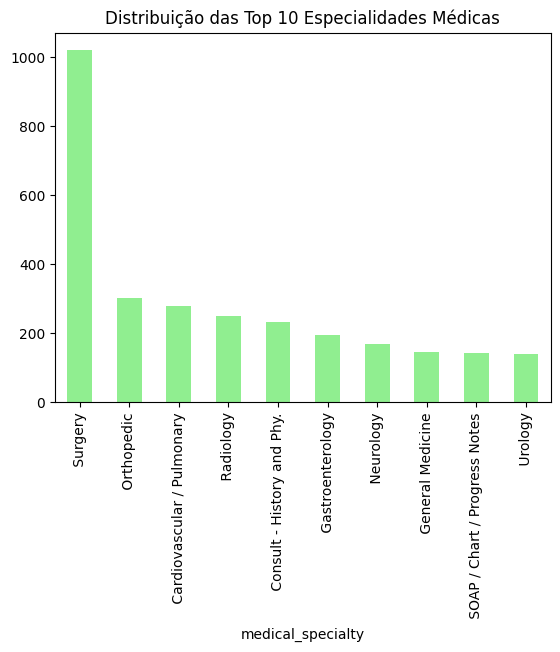

In [169]:
df_top_10['medical_specialty'].value_counts()
print(df_top_10['medical_specialty'].value_counts())
df_top_10['medical_specialty'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribuição das Top 10 Especialidades Médicas')

Como teem-se um número muito maior de cirurgias do que outras especialidades, e visando um menor custo computacional irei reduzir pela metade as amostras de cirurgias.

In [170]:
from imblearn.under_sampling import RandomUnderSampler

In [171]:
x=df_top_10.drop('medical_specialty', axis=1)
y=df_top_10['medical_specialty']

In [172]:
rus=RandomUnderSampler(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = rus.fit_resample(x, y)


In [173]:
X_resampled

,Unnamed: 0,description,sample_name,transcription,keywords
4642,4642,Left thoracotomy with drainage of pleural flu...,Thoracotomy & Esophageal Exploration,"PREOPERATIVE DIAGNOSIS: ,Esophageal rupture.,...","cardiovascular / pulmonary, esophageal rupture..."
4743,4743,"Lung, wedge biopsy right lower lobe and resec...",Lung Biopsy Pathology Report,"CLINICAL HISTORY:, A 48-year-old smoker found...","cardiovascular / pulmonary, pet scan, wedge bi..."
4927,4927,He is a 67-year-old man who suffers from chro...,CAD - 6-Month Followup,"REASON FOR VISIT:, Six-month follow-up visit ...",
4947,4947,Bronchoscopy. Atelectasis and mucous plugging.,Bronchoscopy,"PREOPERATIVE DIAGNOSIS: , Atelectasis.,POSTOPE...","cardiovascular / pulmonary,"
4804,4804,"Fiberoptic bronchoscopy, diagnostic. Hemopty...",Fiberoptic Bronchoscopy - 1,"PREOPERATIVE DIAGNOSIS:,1. Hemoptysis.,2. Hi...","cardiovascular / pulmonary, hemoptysis, lung c..."
...,...,...,...,...,...
173,173,"Cystoscopy, bladder biopsies, and fulguration...",Bladder Biopsies & Fulguration,"PREOPERATIVE DIAGNOSIS:, Bladder lesions with...","urology, cystoscope, carcinoma, transitional c..."
175,175,Patient with a history of gross hematuria. C...,Bladder Cancer,"CHIEF COMPLAINT: , Bladder cancer.,HISTORY OF ...","urology, retrograde pyelogram, bladder biopsy,..."
176,176,Bilateral vasovasostomy surgery sample.,Bilateral Vasovasostomy,Initially a small incision was made in the rig...,"urology, vasovasostomy, adventitial tissue, an..."
178,178,"Cystoscopy, cystocele repair, BioArc midureth...",BioArc Midurethral Sling,"PREOPERATIVE DIAGNOSIS:, Stress urinary incon...","urology, cystoscopy, cystocele repair, bioarc ..."


In [174]:
y_resampled

4642     Cardiovascular / Pulmonary
4743     Cardiovascular / Pulmonary
4927     Cardiovascular / Pulmonary
4947     Cardiovascular / Pulmonary
4804     Cardiovascular / Pulmonary
                   ...             
173                         Urology
175                         Urology
176                         Urology
178                         Urology
180                         Urology
Name: medical_specialty, Length: 1400, dtype: str

In [175]:
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['medical_specialty'])], axis=1)
df_resampled['medical_specialty'].value_counts()

medical_specialty
Cardiovascular / Pulmonary       140
Consult - History and Phy.       140
Gastroenterology                 140
General Medicine                 140
Neurology                        140
Orthopedic                       140
Radiology                        140
SOAP / Chart / Progress Notes    140
Surgery                          140
Urology                          140
Name: count, dtype: int64